In [6]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.datasets import mnist

import visualkeras
# loading dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X = np.concatenate([X_train, X_test], axis = 0)
y = np.concatenate([y_train, y_test], axis = 0)

# reshapring 
X = X.reshape(X.shape[0], 28, 28, 1) 

# casting to float 
X.astype('float32')

# normalizing 
X = X / 255

# encoding output values
y = to_categorical(y)
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 64
EPOCHS = 20
VERBOSE = 2
K_FOLDS = 20


def create_model():
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
    model.add(MaxPool2D((2,2)))

    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D((2,2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))
    
    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )
    
    return model
model = create_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 1600)              0         
                                                                 
 dense_36 (Dense)            (None, 128)             

In [7]:
scores = []
models = []

for i in range(K_FOLDS):
    print("Training on Fold: ",i+1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3
                                               ,random_state = np.random.randint(1,1000, 1)[0])
    
    model = create_model()
    model.fit(
        X_train, 
        y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=VERBOSE,
        validation_split=0.3
    )
    
    scores.append(
        model.evaluate(X_test, y_test, verbose = 0)
    )
    models.append(model)
   
    print("======="*20, end="\n\n\n")

Training on Fold:  1
Epoch 1/20
536/536 - 9s - loss: 0.3139 - accuracy: 0.9030 - val_loss: 0.0825 - val_accuracy: 0.9733 - 9s/epoch - 16ms/step
Epoch 2/20
536/536 - 9s - loss: 0.1045 - accuracy: 0.9695 - val_loss: 0.0540 - val_accuracy: 0.9832 - 9s/epoch - 17ms/step
Epoch 3/20
536/536 - 10s - loss: 0.0663 - accuracy: 0.9816 - val_loss: 0.0459 - val_accuracy: 0.9862 - 10s/epoch - 18ms/step
Epoch 4/20
536/536 - 10s - loss: 0.0533 - accuracy: 0.9841 - val_loss: 0.0455 - val_accuracy: 0.9861 - 10s/epoch - 18ms/step
Epoch 5/20
536/536 - 10s - loss: 0.0408 - accuracy: 0.9877 - val_loss: 0.0403 - val_accuracy: 0.9882 - 10s/epoch - 18ms/step
Epoch 6/20
536/536 - 10s - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.0372 - val_accuracy: 0.9888 - 10s/epoch - 18ms/step
Epoch 7/20
536/536 - 10s - loss: 0.0305 - accuracy: 0.9907 - val_loss: 0.0374 - val_accuracy: 0.9896 - 10s/epoch - 18ms/step
Epoch 8/20
536/536 - 10s - loss: 0.0253 - accuracy: 0.9923 - val_loss: 0.0406 - val_accuracy: 0.9889 - 10s/e

Epoch 4/20
536/536 - 10s - loss: 0.0486 - accuracy: 0.9854 - val_loss: 0.0442 - val_accuracy: 0.9881 - 10s/epoch - 18ms/step
Epoch 5/20
536/536 - 10s - loss: 0.0378 - accuracy: 0.9883 - val_loss: 0.0437 - val_accuracy: 0.9876 - 10s/epoch - 18ms/step
Epoch 6/20
536/536 - 10s - loss: 0.0322 - accuracy: 0.9899 - val_loss: 0.0437 - val_accuracy: 0.9882 - 10s/epoch - 19ms/step
Epoch 7/20
536/536 - 10s - loss: 0.0262 - accuracy: 0.9924 - val_loss: 0.0365 - val_accuracy: 0.9910 - 10s/epoch - 19ms/step
Epoch 8/20
536/536 - 10s - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.0514 - val_accuracy: 0.9876 - 10s/epoch - 19ms/step
Epoch 9/20
536/536 - 10s - loss: 0.0233 - accuracy: 0.9928 - val_loss: 0.0420 - val_accuracy: 0.9894 - 10s/epoch - 19ms/step
Epoch 10/20
536/536 - 10s - loss: 0.0167 - accuracy: 0.9941 - val_loss: 0.0458 - val_accuracy: 0.9896 - 10s/epoch - 19ms/step
Epoch 11/20
536/536 - 10s - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.0439 - val_accuracy: 0.9907 - 10s/epoch - 19ms/ste

Epoch 7/20
536/536 - 10s - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0422 - val_accuracy: 0.9876 - 10s/epoch - 19ms/step
Epoch 8/20
536/536 - 10s - loss: 0.0215 - accuracy: 0.9928 - val_loss: 0.0431 - val_accuracy: 0.9881 - 10s/epoch - 18ms/step
Epoch 9/20
536/536 - 10s - loss: 0.0180 - accuracy: 0.9940 - val_loss: 0.0453 - val_accuracy: 0.9884 - 10s/epoch - 19ms/step
Epoch 10/20
536/536 - 10s - loss: 0.0168 - accuracy: 0.9943 - val_loss: 0.0424 - val_accuracy: 0.9886 - 10s/epoch - 18ms/step
Epoch 11/20
536/536 - 10s - loss: 0.0144 - accuracy: 0.9958 - val_loss: 0.0401 - val_accuracy: 0.9903 - 10s/epoch - 18ms/step
Epoch 12/20
536/536 - 10s - loss: 0.0132 - accuracy: 0.9960 - val_loss: 0.0478 - val_accuracy: 0.9876 - 10s/epoch - 18ms/step
Epoch 13/20
536/536 - 10s - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.0603 - val_accuracy: 0.9877 - 10s/epoch - 18ms/step
Epoch 14/20
536/536 - 10s - loss: 0.0148 - accuracy: 0.9950 - val_loss: 0.0400 - val_accuracy: 0.9886 - 10s/epoch - 19ms/

Epoch 10/20
536/536 - 10s - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.0400 - val_accuracy: 0.9893 - 10s/epoch - 19ms/step
Epoch 11/20
536/536 - 10s - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0373 - val_accuracy: 0.9896 - 10s/epoch - 19ms/step
Epoch 12/20
536/536 - 10s - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.0411 - val_accuracy: 0.9899 - 10s/epoch - 19ms/step
Epoch 13/20
536/536 - 10s - loss: 0.0127 - accuracy: 0.9961 - val_loss: 0.0457 - val_accuracy: 0.9895 - 10s/epoch - 19ms/step
Epoch 14/20
536/536 - 10s - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0458 - val_accuracy: 0.9904 - 10s/epoch - 19ms/step
Epoch 15/20
536/536 - 10s - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.0435 - val_accuracy: 0.9899 - 10s/epoch - 19ms/step
Epoch 16/20
536/536 - 10s - loss: 0.0082 - accuracy: 0.9973 - val_loss: 0.0459 - val_accuracy: 0.9905 - 10s/epoch - 19ms/step
Epoch 17/20
536/536 - 10s - loss: 0.0086 - accuracy: 0.9972 - val_loss: 0.0535 - val_accuracy: 0.9897 - 10s/epoch - 20

Epoch 13/20
536/536 - 11s - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.0461 - val_accuracy: 0.9887 - 11s/epoch - 20ms/step
Epoch 14/20
536/536 - 11s - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.0463 - val_accuracy: 0.9876 - 11s/epoch - 20ms/step
Epoch 15/20
536/536 - 11s - loss: 0.0110 - accuracy: 0.9963 - val_loss: 0.0492 - val_accuracy: 0.9884 - 11s/epoch - 21ms/step
Epoch 16/20
536/536 - 11s - loss: 0.0122 - accuracy: 0.9963 - val_loss: 0.0419 - val_accuracy: 0.9901 - 11s/epoch - 21ms/step
Epoch 17/20
536/536 - 12s - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0458 - val_accuracy: 0.9904 - 12s/epoch - 22ms/step
Epoch 18/20
536/536 - 11s - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.0413 - val_accuracy: 0.9913 - 11s/epoch - 20ms/step
Epoch 19/20
536/536 - 11s - loss: 0.0078 - accuracy: 0.9971 - val_loss: 0.0656 - val_accuracy: 0.9881 - 11s/epoch - 20ms/step
Epoch 20/20
536/536 - 11s - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.0413 - val_accuracy: 0.9904 - 11s/epoch - 21

Epoch 16/20
536/536 - 11s - loss: 0.0125 - accuracy: 0.9961 - val_loss: 0.0387 - val_accuracy: 0.9914 - 11s/epoch - 20ms/step
Epoch 17/20
536/536 - 11s - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0456 - val_accuracy: 0.9909 - 11s/epoch - 21ms/step
Epoch 18/20
536/536 - 12s - loss: 0.0101 - accuracy: 0.9968 - val_loss: 0.0424 - val_accuracy: 0.9908 - 12s/epoch - 22ms/step
Epoch 19/20
536/536 - 18s - loss: 0.0067 - accuracy: 0.9975 - val_loss: 0.0553 - val_accuracy: 0.9894 - 18s/epoch - 34ms/step
Epoch 20/20
536/536 - 17s - loss: 0.0104 - accuracy: 0.9968 - val_loss: 0.0456 - val_accuracy: 0.9917 - 17s/epoch - 31ms/step


Training on Fold:  17
Epoch 1/20
536/536 - 16s - loss: 0.3314 - accuracy: 0.8951 - val_loss: 0.0757 - val_accuracy: 0.9761 - 16s/epoch - 30ms/step
Epoch 2/20
536/536 - 16s - loss: 0.0929 - accuracy: 0.9725 - val_loss: 0.0683 - val_accuracy: 0.9789 - 16s/epoch - 30ms/step
Epoch 3/20
536/536 - 17s - loss: 0.0668 - accuracy: 0.9807 - val_loss: 0.0485 - val_accuracy: 0.

Epoch 19/20
536/536 - 11s - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0522 - val_accuracy: 0.9888 - 11s/epoch - 20ms/step
Epoch 20/20
536/536 - 12s - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.0531 - val_accuracy: 0.9884 - 12s/epoch - 23ms/step


Training on Fold:  20
Epoch 1/20
536/536 - 12s - loss: 0.3338 - accuracy: 0.8959 - val_loss: 0.0846 - val_accuracy: 0.9732 - 12s/epoch - 23ms/step
Epoch 2/20
536/536 - 12s - loss: 0.0916 - accuracy: 0.9729 - val_loss: 0.0620 - val_accuracy: 0.9817 - 12s/epoch - 22ms/step
Epoch 3/20
536/536 - 13s - loss: 0.0641 - accuracy: 0.9803 - val_loss: 0.0533 - val_accuracy: 0.9846 - 13s/epoch - 24ms/step
Epoch 4/20
536/536 - 14s - loss: 0.0471 - accuracy: 0.9857 - val_loss: 0.0494 - val_accuracy: 0.9863 - 14s/epoch - 26ms/step
Epoch 5/20
536/536 - 12s - loss: 0.0410 - accuracy: 0.9874 - val_loss: 0.0508 - val_accuracy: 0.9862 - 12s/epoch - 22ms/step
Epoch 6/20
536/536 - 12s - loss: 0.0329 - accuracy: 0.9902 - val_loss: 0.0508 - val_accuracy: 0.987

K20 Fold cross results:
Accuracy: 52.049733651801944
Std: 46.92273538411793
K value: 20


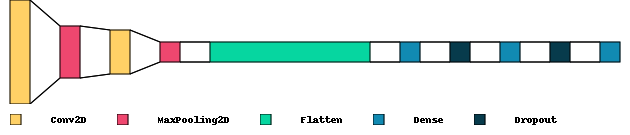

In [8]:
print(f"K{K_FOLDS} Fold cross results:")
print("Accuracy:", np.mean(scores) * 100)
print("Std:",      np.std(scores) * 100)
print("K value:", len(scores))
visualkeras.layered_view(models[0], legend=True, draw_volume=False,spacing=30)

657/657 [==============================] - 2s 4ms/step


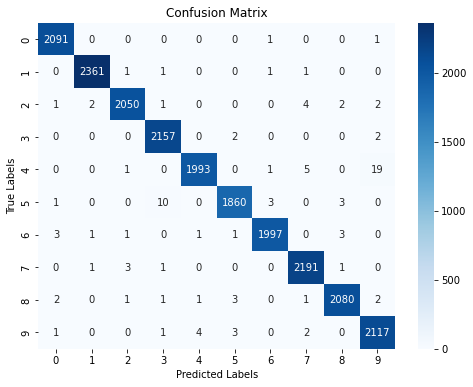

In [9]:
# predicting on test set
y_pred = np.argmax(models[0].predict(X_test), axis=-1)

# computing confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)
 
# visualizing confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()